In [2]:
import random
import simpy
import math

NEW_CUSTOMERS =5  
INTERVAL_CUSTOMERS = 4.0  
MIN_PATIENCE = 2 
MAX_PATIENCE = 5 
TIME_IN_BANK=12.0

CLIENTES=0
ATENDIDOS=0 
ABANDONAN=0 
tfila=0 
tbanco=0 
Tfila=0 
fila=[[],[]] 
banco=[[],[]] 

SEED_U=24242
SEED_E=24242 

def source(env, nclientes, interval, counter):

    semilla=5 
    
   
    for i in range(nclientes):
        c = customer(env, 'Cliente%02d' % i, counter)
        env.process(c)
        semilla,t=exponencial(semilla,1.0 / interval)
        yield env.timeout(t)


def customer(env, name, counter):
   
    global ATENDIDOS,ABANDONAN,CLIENTES,tfila,tbanco,Tfila,SEED_U,SEED_E
    
    arrive = env.now 
    
    CLIENTES+=1;
    banco[0].append(arrive)
    banco[1].append(CLIENTES-ATENDIDOS-ABANDONAN)
    if CLIENTES-ATENDIDOS-ABANDONAN > 1:
        fila[0].append(arrive)
        fila[1].append(CLIENTES-ATENDIDOS-ABANDONAN-1)
   
  
    
    with counter.request() as req:
        SEED_U,patience = uniforme(SEED_U,MIN_PATIENCE, MAX_PATIENCE)
      
        
        results = yield req | env.timeout(patience)
        
        Tfila +=CLIENTES-ATENDIDOS-ABANDONAN-1
        if CLIENTES-ATENDIDOS-ABANDONAN > 1:
            fila[0].append(env.now)
            fila[1].append(CLIENTES-ATENDIDOS-ABANDONAN-2)
        
        wait = env.now - arrive
        
        tfila+=wait
        
        if req in results:
            
            SEED_E,tib = exponencial(SEED_E,1.0 / TIME_IN_BANK)
            
            yield env.timeout(tib)
       
            ATENDIDOS+=1;
        else:
            
            ABANDONAN+=1
        tbanco=env.now-arrive
        banco[0].append(env.now)
        banco[1].append(CLIENTES- ATENDIDOS-ABANDONAN)
        
def Aleatorio(x):
    a=1664525
    b=1013904223
    m=2**32
    x=(a*x+b)%m
    u=float(x)/m
    return u,x

def exponencial(x,landa):
    u,x = Aleatorio(x)
    return x,-math.log(1-u)/landa

def uniforme(x,a,b):
    u,x = Aleatorio(x)
    return x,a+u*(b-a)


env = simpy.Environment()

counter = simpy.Resource(env, capacity=1)
env.process(source(env, NEW_CUSTOMERS, INTERVAL_CUSTOMERS, counter))
env.run()

Número de clientes que llegaron: 5
Número de clientes que fueron atendidos en el banco: 2
Número de clientes que abandonaron el banco: 3
Tiempo promedio de espera del cliente en la fila: 1.59319386142
Tiempo promedio del cliente en el banco: 0.304733694568
Tamaño promedio de la fila: 0


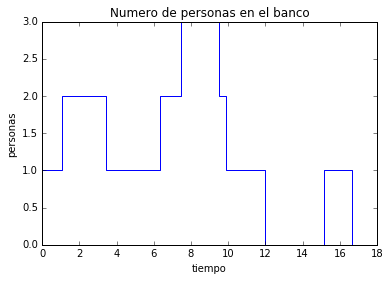

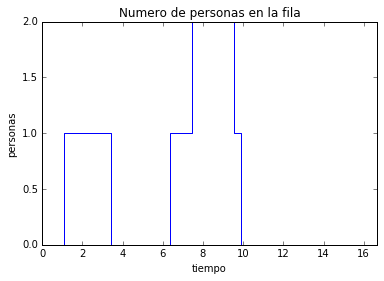

In [3]:
def estadisticas():
    print('Número de clientes que llegaron: '+str(CLIENTES))
    print('Número de clientes que fueron atendidos en el banco: '+str(ATENDIDOS))
    print('Número de clientes que abandonaron el banco: '+str(ABANDONAN))
    print('Tiempo promedio de espera del cliente en la fila: '+str(tfila/CLIENTES))
    print('Tiempo promedio del cliente en el banco: '+str(tbanco/CLIENTES))
    print('Tamaño promedio de la fila: '+str(Tfila/CLIENTES))

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
def grafica():
    #banco
    xb=np.repeat(banco[0],2).tolist()
    xb.append(0)
    tb=np.repeat(banco[1],2).tolist()
    tb.insert(0,0)
    
    plt.title('Numero de personas en el banco')
    plt.plot(xb,tb)
    plt.ylabel('personas')
    plt.xlabel('tiempo')
    plt.show()
    
    #fila
    xf=np.repeat(fila[0],2).tolist()
    xf.append(0)
    tf=np.repeat(fila[1],2).tolist()
    tf.insert(0,0)
    
    plt.plot(xf,tf)
    plt.title('Numero de personas en la fila')
    plt.xlim(0,max(banco[0]))
    plt.ylabel('personas')
    plt.xlabel('tiempo')
    plt.show()
estadisticas()
grafica()

### Realice las simulaciones calculando y graficando lo que implementó, para los siguiente escenarios:

### Escenaria 1


Escenario A


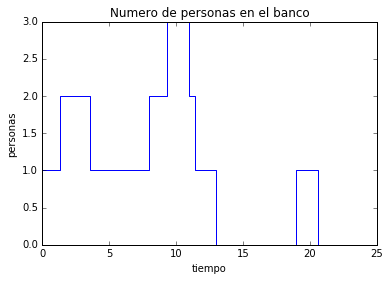

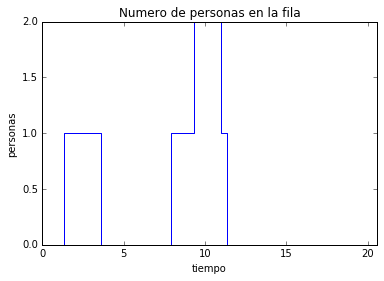

Número de clientes que llegaron: 5
Número de clientes que fueron atendidos en el banco: 2
Número de clientes que abandonaron el banco: 3
Tiempo promedio de espera del cliente en la fila: 1.46212924095
Tiempo promedio del cliente en el banco: 0.330128169115
Tamaño promedio de la fila: 0


In [4]:
'''Primero'''
INTERVAL_CUSTOMERS = 5.0  
MIN_PATIENCE = 2  
MAX_PATIENCE = 4 
TIME_IN_BANK=13.0

print('Escenario A')
CLIENTES=0 
ATENDIDOS=0 
ABANDONAN=0 
tfila=0 
tbanco=0 
Tfila=0 
fila=[[],[]] 
banco=[[],[]] 

SEED_U=24242 
SEED_E=24242 

env = simpy.Environment()

counter = simpy.Resource(env, capacity=1)
env.process(source(env, NEW_CUSTOMERS, INTERVAL_CUSTOMERS, counter))
env.run()

grafica()
estadisticas()

### Escenario No2

Escenario B


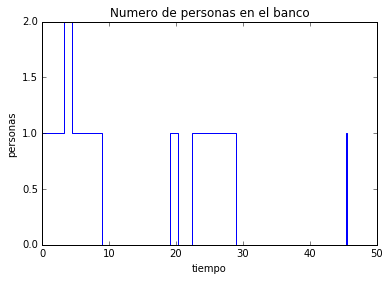

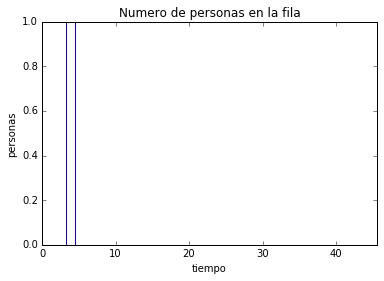

Número de clientes que llegaron: 5
Número de clientes que fueron atendidos en el banco: 4
Número de clientes que abandonaron el banco: 1
Tiempo promedio de espera del cliente en la fila: 0.247696797922
Tiempo promedio del cliente en el banco: 0.033812312634
Tamaño promedio de la fila: 0


In [5]:

INTERVAL_CUSTOMERS = 12.0  
MIN_PATIENCE = 1 
MAX_PATIENCE = 3 
TIME_IN_BANK=9.0

print('Escenario 2')
CLIENTES=0 
ATENDIDOS=0 
ABANDONAN=0 
tfila=0
tbanco=0 
Tfila=0
fila=[[],[]] 
banco=[[],[]] 

SEED_U=24242 
SEED_E=24242 

env = simpy.Environment()

counter = simpy.Resource(env, capacity=1
env.process(source(env, NEW_CUSTOMERS, INTERVAL_CUSTOMERS, counter))
env.run()

grafica()
estadisticas()

## Analisis:
analizando los 2 casos podemos analisar  que  en el segundo caso posee una mayor atencion a los clientes,esto lo pedemos ver en las colas que a pesar que el tiempo promedio de los clientes en el banco es muy cercano,el segundo escenario ofrece una mejor atencion.